In [2]:
import pandas as pd

titanic = pd.read_csv("/Users/thomassimmons/Downloads/Titanic-Dataset.csv")

titanic.head()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

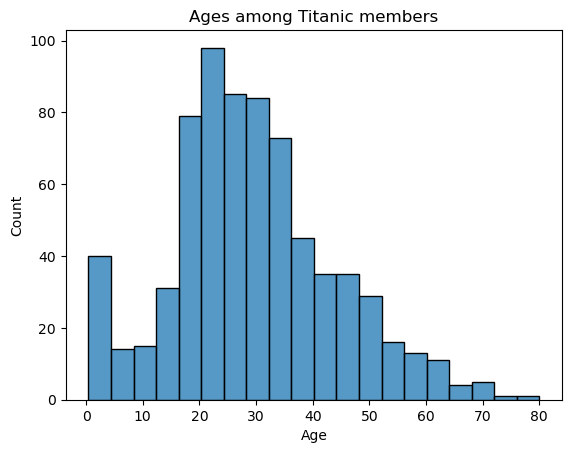

In [6]:
# For visualization, use Seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic['Age'])
plt.title("Ages among Titanic members")
plt.show()

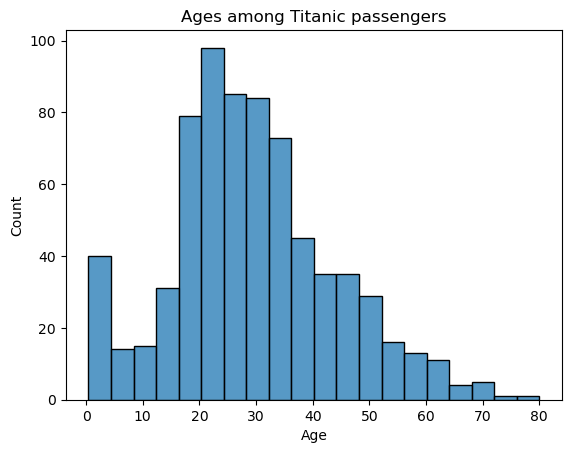

In [23]:
titanic.isnull().sum()

sns.histplot(titanic['Age'])
plt.title("Ages among Titanic passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

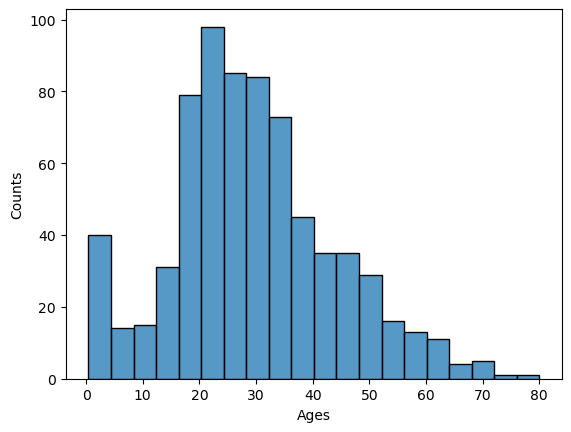

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
sns.histplot(titanic['Age'])
plt.xlabel("Ages")
plt.ylabel("Counts")
plt.show()

titanic.isnull().sum()

Text(0, 0.5, 'Counts')

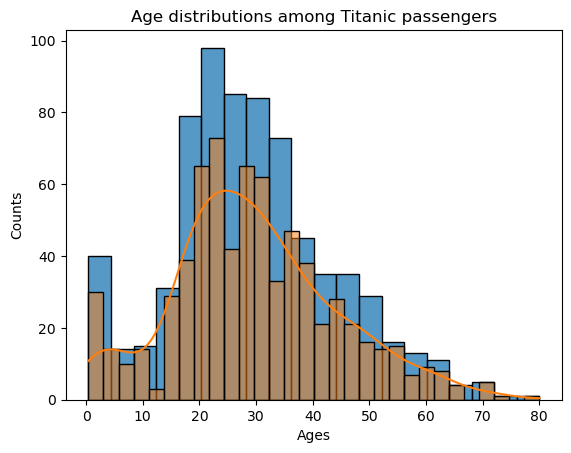

In [ ]:
sns.histplot(titanic['Age'])
sns.histplot(titanic['Age'].dropna(), bins=30, kde = True)
plt.title("Age distributions among Titanic passengers")
plt.xlabel("Ages")
plt.ylabel("Counts")

<Axes: xlabel='Survived', ylabel='count'>

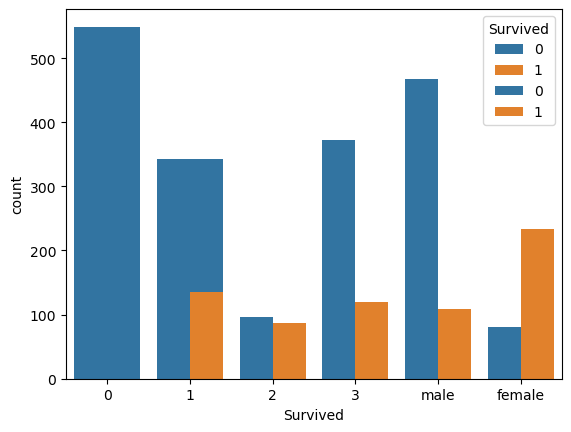

In [ ]:
sns.countplot(x='Survived', data=titanic)
sns.countplot(x='Pclass', hue='Survived', data=titanic)
sns.countplot(x='Sex', hue='Survived', data=titanic)

In [ ]:
# Some data cleaning
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Age'].describe()

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Removing null values
titanic['Cabin'].fillna(titanic['Cabin'].mode(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode(), inplace=True)

In [ ]:
# Lets drop unnecessary columns
# First show all columns
titanic.columns
titanic.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
# Axis = 1 means drop columns
# Axis = 0 means drop rows
# .drop command needs a cue like this

In [71]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [76]:
titanic['Sex']
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns = ['Embarked'], drop_first=True)

In [77]:
titanic['Sex']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Sex, Length: 891, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

In [ ]:
titanic.columns
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,0.0,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,NaN,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.columns
titanic.isnull().sum()

# titanic.drop(['Sex'], axis=1, inplace=True)

KeyError: "['Sex'] not found in axis"

In [89]:
titanic.columns

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [90]:
titanic.columns = titanic.columns.str.strip().str.lower().str.replace(' ', '_')

In [92]:
titanic.isna().sum()

passengerid    0
survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
embarked_q     0
embarked_s     0
dtype: int64

In [94]:
titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked_q        bool
embarked_s        bool
dtype: object

In [100]:
titanic['age'].tail()
titanic['age'] = titanic['age'].astype('int64')

In [101]:
titanic['age'].head()

0    22
1    38
2    26
3    35
4    35
Name: age, dtype: int64

In [104]:
titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
age              int64
sibsp            int64
parch            int64
fare           float64
embarked_q        bool
embarked_s        bool
dtype: object

In [107]:
titanic['embarked_q'] = titanic['embarked_q'].astype('int64')

In [108]:
titanic['embarked_q']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    1
Name: embarked_q, Length: 891, dtype: int64

In [110]:
titanic['embarked_s'] = titanic['embarked_s'].astype('int64')

In [111]:
titanic['embarked_s']

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: embarked_s, Length: 891, dtype: int64

In [121]:
titanic.dtypes
titanic['pclass'] = titanic['pclass'].astype('category')

In [122]:
titanic['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [ ]:
print("Titanic shape:\n", titanic.shape)
print("Titanic data types:\n", titanic.dtypes)

Titanic shape:
 (891, 9)
Titanic data types:
 passengerid       int64
survived          int64
pclass         category
age               int64
sibsp             int64
parch             int64
fare            float64
embarked_q        int64
embarked_s        int64
dtype: object


In [133]:
titanic.head()

,passengerid,survived,pclass,age,sibsp,parch,fare,embarked_q,embarked_s
0,1,0,3,22,1,0,7.2500,0,1
1,2,1,1,38,1,0,71.2833,0,0
2,3,1,3,26,0,0,7.9250,0,1
3,4,1,1,35,1,0,53.1000,0,1
4,5,0,3,35,0,0,8.0500,0,1


In [135]:
print("null values:\n", titanic.isnull().sum())

null values:
 passengerid    0
survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
embarked_q     0
embarked_s     0
dtype: int64


In [136]:
titanic.describe(include='all')

,passengerid,survived,pclass,age,sibsp,parch,fare,embarked_q,embarked_s
count,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,NaN,29.345679,0.523008,0.381594,32.204208,0.086420,0.722783
std,257.353842,0.486592,NaN,13.028212,1.102743,0.806057,49.693429,0.281141,0.447876
min,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,NaN,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,NaN,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000


Text(0, 0.5, 'counts')

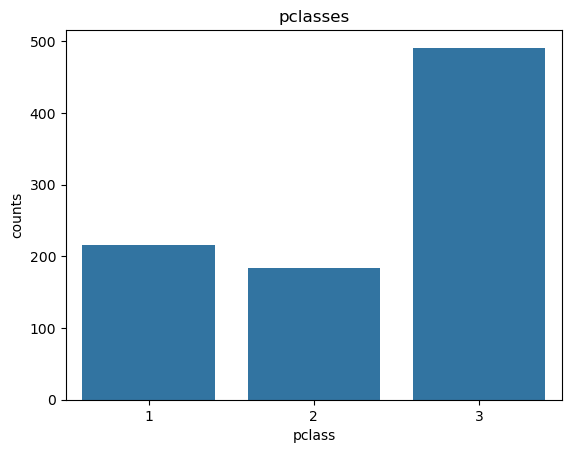

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt 

titanic.dtypes

# Gender distribution
sns.countplot(x='pclass', data=titanic)
plt.title('pclasses')
plt.xlabel('pclass')
plt.ylabel('counts')

Text(0, 0.5, 'Counts')

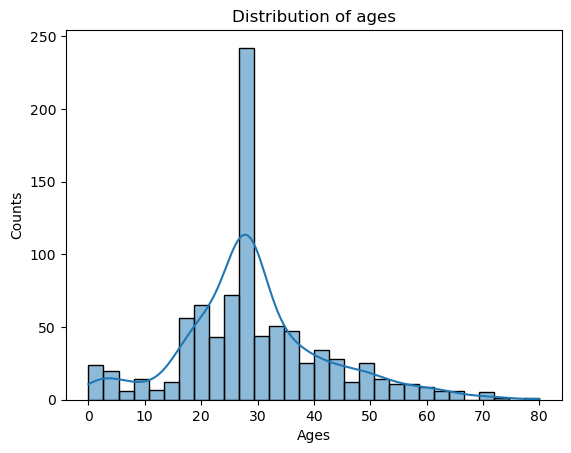

In [148]:
sns.histplot(titanic['age'].dropna(), bins=30, kde=True)
plt.title("Distribution of ages")
plt.xlabel("Ages")
plt.ylabel("Counts")

In [ ]:
titanic
titanic.describe()

titanic.isnull().sum()
titanic.columns
titanic.dtypes 

passengerid       int64
survived          int64
pclass         category
age               int64
sibsp             int64
parch             int64
fare            float64
embarked_q        int64
embarked_s        int64
dtype: object

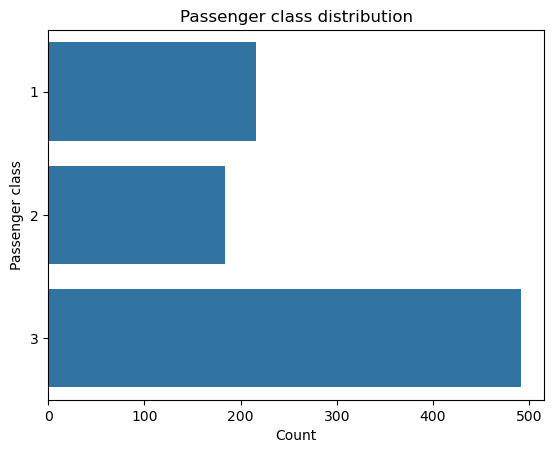

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(titanic['pclass'])
plt.title("Passenger class distribution")
plt.xlabel("Count")
plt.ylabel("Passenger class")
plt.show()

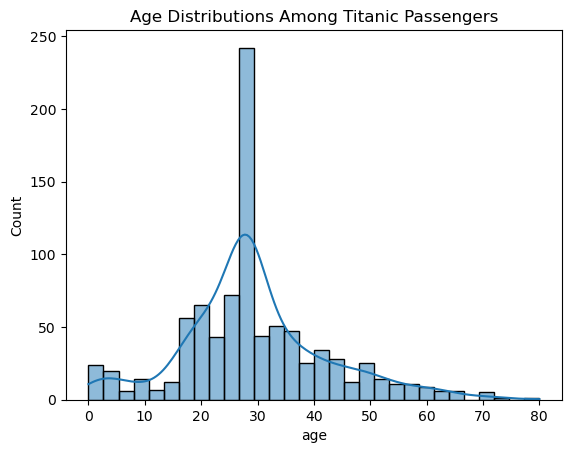

In [176]:
# Histogram - multiple plots

plt.figure()
sns.histplot(titanic['age'].dropna(), bins=30, kde=True)
plt.title("Age Distributions Among Titanic Passengers")
plt.show()

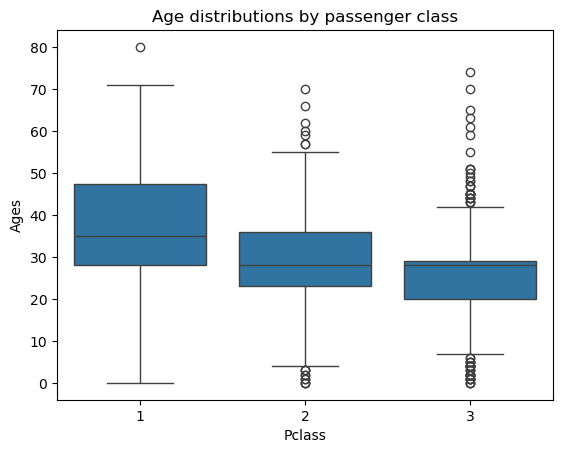

In [181]:
plt.figure()
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title("Age distributions by passenger class")
plt.xlabel("Pclass")
plt.ylabel("Ages")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

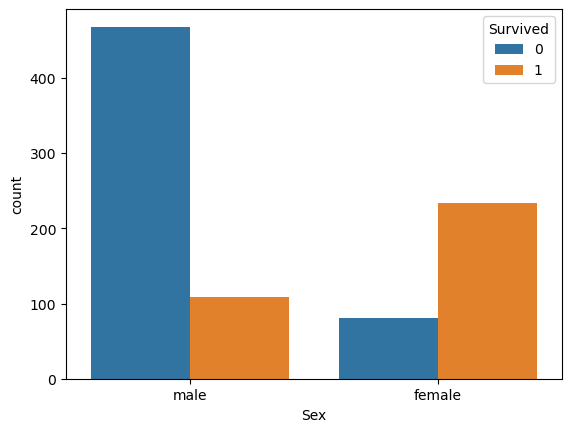

In [189]:
titanic2 = pd.read_csv("/Users/thomassimmons/Downloads/Titanic-Dataset.csv")

titanic2['Sex']

sns.countplot(x='Sex', hue='Survived', data=titanic2)
